<h1>Simple Plotting</h1>

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


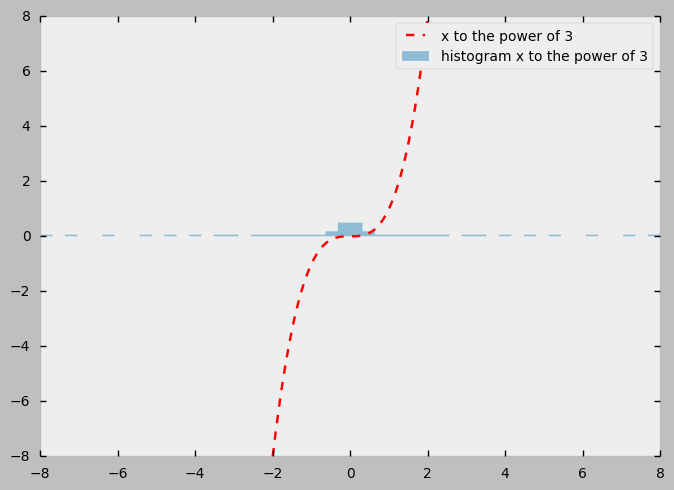

In [7]:
import numpy as np
import matplotlib.pyplot as plt
print plt.style.available
plt.style.use('seaborn-notebook')
x=np.linspace(-2.,2.)
y=x**3
plt.hist(y,bins=50, alpha=0.5, label='histogram x to the power of 3', histtype='stepfilled'
         #)
          ,normed=True)
plt.plot(x, y, 'r--', label='x to the power of 3')
plt.grid()
plt.legend()
plt.show()

<h1>Plotting GEV CDF and PDF</h1>

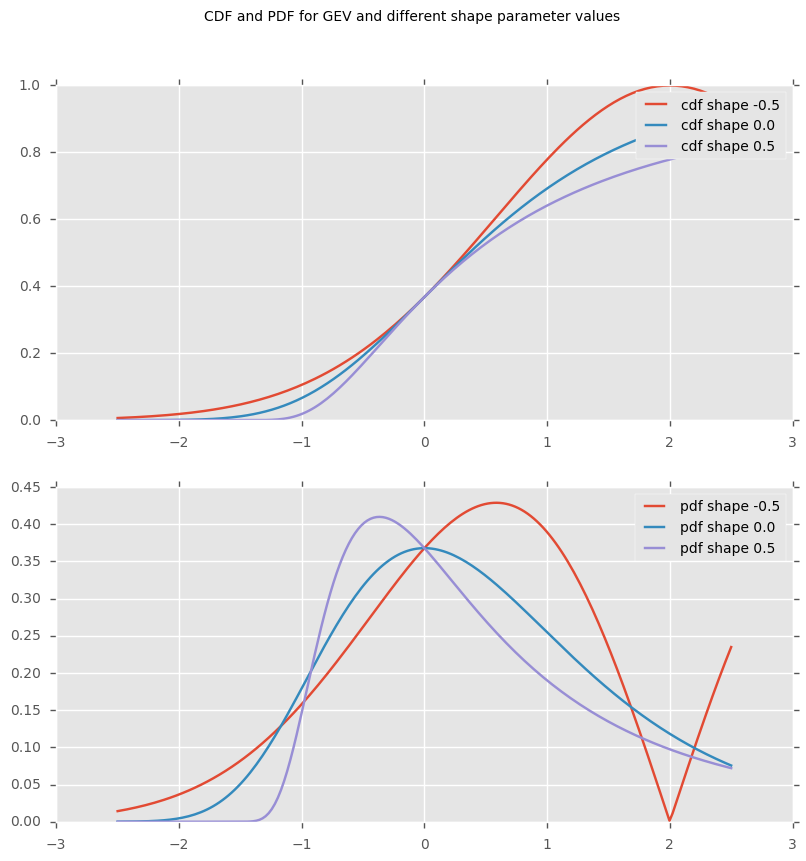

In [2]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

par={'mu':0.,'sigma':1.}
xi=[-0.5,0.,0.5]
rangeX=np.linspace(-2.5,2.5,num=200)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(9.5, 9.5))
fig.suptitle('CDF and PDF for GEV and different shape parameter values')
#fig = plt.figure(figsize=(20, 20))
t0=lambda y: exp(-(y-par['mu'])/par['sigma'])
tx=lambda y,xi_i: (1.+xi_i*(y-par['mu'])/par['sigma'])**(-1./xi_i)

#fig.add_subplot(2,1,1)
for xi_i in xi:
    if xi_i > 0.0 or xi_i <0.0: #safer float comparison for xi_i==0
        H_cdf=lambda x: exp(-tx(x,xi_i))
        H_pdf=lambda x: ((1./par['sigma'])*(tx(x,xi_i))**(xi_i+1.))*exp(-tx(x,xi_i))
    else:
        H_cdf=lambda x: exp(-t0(x))
        H_pdf=lambda x: ((1./par['sigma'])*(t0(x))**(xi_i+1.))*exp(-t0(x))
    gev_cdf=np.array([H_cdf(x) for x in rangeX])
    gev_pdf=np.array([H_pdf(x) for x in rangeX])
    ax1.plot(rangeX, gev_cdf, '-', label='cdf shape {}'.format(xi_i))
    ax2.plot(rangeX, gev_pdf, '-', label='pdf shape {}'.format(xi_i))
ax1.legend()
plt.grid()
ax2.legend()
plt.grid()
plt.show()